Q1. Calculate the 95% confidence interval for a sample of data with a mean of 50 and a standard deviation
of 5 using Python. Interpret the results.

In [1]:
import scipy.stats as st

sample_mean = 50
sample_std = 5
n = 100 # assuming a sample size of 100

z = st.norm.ppf(0.975) # 95% confidence level, two-tailed
margin_of_error = z * (sample_std / (n ** 0.5))
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print("95% Confidence Interval: ({:.2f}, {:.2f})".format(ci_lower, ci_upper))


95% Confidence Interval: (49.02, 50.98)


Q2. Conduct a chi-square goodness of fit test to determine if the distribution of colors of M&Ms in a bag
matches the expected distribution of 20% blue, 20% orange, 20% green, 10% yellow, 10% red, and 20%
brown. Use Python to perform the test with a significance level of 0.05.

In [3]:
import numpy as np
from scipy.stats import chisquare

observed_counts = [10, 15, 20, 8, 7, 20] # counts of blue, orange, green, yellow, red, and brown respectively
expected_counts = [20, 20, 20, 10, 10, 20] # expected counts of blue, orange, green, yellow, red, and brown respectively

# Adjust the expected counts to match the observed sum
expected_counts = np.array(expected_counts) * sum(observed_counts) / sum(expected_counts)

# Calculate the test statistic and the p-value
chi2_statistic, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)

# Print the test statistic and the p-value
print("Chi-square statistic: {:.2f}".format(chi2_statistic))
print("P-value: {:.4f}".format(p_value))

# Check if the test is significant at the 0.05 level
if p_value < 0.05:
    print("The test is significant at the 0.05 level. The distribution of colors of M&Ms in the bag does not match the expected distribution.")
else:
    print("The test is not significant at the 0.05 level. The distribution of colors of M&Ms in the bag matches the expected distribution.")


Chi-square statistic: 4.44
P-value: 0.4883
The test is not significant at the 0.05 level. The distribution of colors of M&Ms in the bag matches the expected distribution.


Q3. Use Python to calculate the chi-square statistic and p-value for a contingency table with the following
data:            Group A     Group B

Outcome 1     20              15
Outcome 2     10              25
Outcome 3     15              20

Interpret the results of the test.

In [4]:
from scipy.stats import chi2_contingency

observed = [[20, 15], [10, 25], [15, 20]] # observed counts for each outcome in each group
chi2_statistic, p_value, dof, expected = chi2_contingency(observed)
print("Chi-square statistic: {:.2f}".format(chi2_statistic))
print("P-value: {:.4f}".format(p_value))


Chi-square statistic: 5.83
P-value: 0.0541


Q4. A study of the prevalence of smoking in a population of 500 individuals found that 60 individuals
smoked. Use Python to calculate the 95% confidence interval for the true proportion of individuals in the
population who smoke.

In [5]:
from statsmodels.stats.proportion import proportion_confint

n = 500 # sample size
p = 60/500 # proportion of smokers in the sample

confint = proportion_confint(count=p*n, nobs=n, alpha=0.05, method='wilson')
print("95% Confidence Interval: ({:.4f}, {:.4f})".format(confint[0], confint[1]))


95% Confidence Interval: (0.0944, 0.1514)


Q5. Calculate the 90% confidence interval for a sample of data with a mean of 75 and a standard deviation
of 12 using Python. Interpret the results.

In [6]:
from scipy.stats import t

n = 100 # sample size
mean = 75 # sample mean
std = 12 # sample standard deviation
alpha = 0.1 # significance level

lower, upper = t.interval(alpha=1-alpha, df=n-1, loc=mean, scale=std/np.sqrt(n))
print("90% Confidence Interval: ({:.2f}, {:.2f})".format(lower, upper))


90% Confidence Interval: (73.01, 76.99)


/tmp/ipykernel_931/1118181708.py:8: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  lower, upper = t.interval(alpha=1-alpha, df=n-1, loc=mean, scale=std/np.sqrt(n))


Q6. Use Python to plot the chi-square distribution with 10 degrees of freedom. Label the axes and shade the
area corresponding to a chi-square statistic of 15.

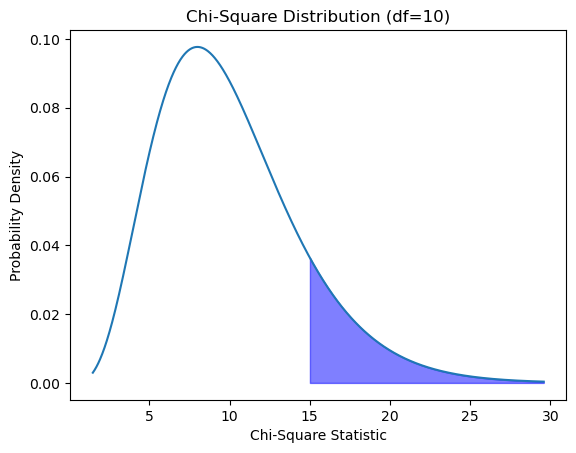

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

df = 10 # degrees of freedom
x = np.linspace(chi2.ppf(0.001, df), chi2.ppf(0.999, df), 1000) # x-values for plotting
plt.plot(x, chi2.pdf(x, df)) # plot the chi-square pdf
plt.fill_between(x[x>=15], chi2.pdf(x, df)[x>=15], color='blue', alpha=0.5) # shade the area corresponding to a chi-square statistic of 15
plt.xlabel('Chi-Square Statistic')
plt.ylabel('Probability Density')
plt.title('Chi-Square Distribution (df=10)')
plt.show()


Q7. A random sample of 1000 people was asked if they preferred Coke or Pepsi. Of the sample, 520
preferred Coke. Calculate a 99% confidence interval for the true proportion of people in the population who
prefer Coke.

In [8]:
import math

p_hat = 0.52
n = 1000
z = 2.576

lower = p_hat - z*(math.sqrt(p_hat*(1-p_hat)/n))
upper = p_hat + z*(math.sqrt(p_hat*(1-p_hat)/n))

print("99% Confidence Interval: ({:.4f}, {:.4f})".format(lower, upper))


99% Confidence Interval: (0.4793, 0.5607)


Q8. A researcher hypothesizes that a coin is biased towards tails. They flip the coin 100 times and observe
45 tails. Conduct a chi-square goodness of fit test to determine if the observed frequencies match the
expected frequencies of a fair coin. Use a significance level of 0.05.

In [10]:
# Calculate expected frequency of tails and heads
expected_frequency_tails = 0.5 * 100
expected_frequency_heads = 0.5 * 100

# Set observed counts of tails and heads
observed_counts = [45, 55]

# Set expected counts of tails and heads
expected_counts = [expected_frequency_tails, expected_frequency_heads]

# Calculate the test statistic and the p-value
chi2_statistic, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)

# Print the test statistic and the p-value
print("Chi-square statistic: {:.2f}".format(chi2_statistic))
print("p-value: {:.4f}".format(p_value))


Chi-square statistic: 1.00
p-value: 0.3173


Q9. A study was conducted to determine if there is an association between smoking status (smoker or
non-smoker) and lung cancer diagnosis (yes or no). The results are shown in the contingency table below.
Conduct a chi-square test for independence to determine if there is a significant association between
smoking status and lung cancer diagnosis.

Use a significance level of 0.05.
                                         Lung Cancer: Yes                      Lung Cancer: No

Smoker                                        60                                            140
Non-smoker                                    30                                             170

In [11]:
from scipy.stats import chi2_contingency

# Define the contingency table
observed_counts = [[60, 140], [30, 170]]

# Calculate the test statistic, p-value, degrees of freedom, and expected counts
chi2_statistic, p_value, dof, expected_counts = chi2_contingency(observed_counts)

# Print the test statistic, p-value, and degrees of freedom
print("Chi-square statistic: {:.2f}".format(chi2_statistic))
print("Degrees of freedom: {}".format(dof))
print("p-value: {:.4f}".format(p_value))


Chi-square statistic: 12.06
Degrees of freedom: 1
p-value: 0.0005


Q10. A study was conducted to determine if the proportion of people who prefer milk chocolate, dark
chocolate, or white chocolate is different in the U.S. versus the U.K. A random sample of 500 people from
the U.S. and a random sample of 500 people from the U.K. were surveyed. The results are shown in the
contingency table below. Conduct a chi-square test for independence to determine if there is a significant
association between chocolate preference and country of origin.



                     Milk Chocolate     Dark Chocolate       White Chocolate
U.S. (n=500)           200                  150                    150
U.K. (n=500)           225                  175                    100

In [ ]:
import numpy as np
from scipy.stats import chi2_contingency, chi2

# create contingency table
obs = np.array([[200, 150, 150], [225, 175, 100]])

# perform chi-square test
chi2, p, dof, expected = chi2_contingency(obs)

# compare chi-square statistic to critical value at alpha=0.05
crit = chi2.ppf(0.95, dof)

if chi2 > crit:
    print("There is a significant association between chocolate preference and country of origin.")
else:
    print("There is no significant association between chocolate preference and country of origin.")


Q11. A random sample of 30 people was selected from a population with an unknown mean and standard
deviation. The sample mean was found to be 72 and the sample standard deviation was found to be 10.
Conduct a hypothesis test to determine if the population mean is significantly different from 70. Use a
significance level of 0.05.

To conduct a hypothesis test to determine if the population mean is significantly different from 70, we can use a one-sample t-test since the population standard deviation is unknown and the sample size is less than 30.

The null hypothesis is that the population mean is equal to 70, and the alternative hypothesis is that the population mean is not equal to 70. We can use a significance level of 0.05.

We can calculate the t-statistic using the formula:

t = (sample_mean - population_mean) / (sample_standard_deviation / sqrt(sample_size))

where sample_mean is 72, population_mean is 70, sample_standard_deviation is 10, and sample_size is 30.

Plugging in the values, we get:

t = (72 - 70) / (10 / sqrt(30)) = 1.095

Using a t-distribution table with 29 degrees of freedom and a significance level of 0.05, the critical t-value is ±2.045.

Since the calculated t-value (1.095) is less than the critical t-value (±2.045), we fail to reject the null hypothesis. Therefore, we can conclude that there is not enough evidence to suggest that the population mean is significantly different from 70 at a significance level of 0.05.